In [12]:
from __future__ import print_function, division

# 1. Visualisation with  `matplotlib`
________
The library `matplotlib` is an extremely versatile graphics library written for Python in order to replicate and produce MATLAB type visualisations for engineering and scientific research. It is a low-level library and uses Python as the grammar for its graphics creation. 

In this section of the course, we will learn about the `Figure` and `Axes` objects. These represent the backbone of `matplotlib` and all other objects are created on these two objects. We will learn how to generate the simplest chart - the "bread and butter" of scientific visualisation - line plots and scatter plots. 

Then we will cover distributional plots in one and two dimensions. Density based plots are especially important when the number of data points are huge and overplotting becomes a problem. 

Next we will learn how to create subplots, annotations and customizing your plot. 

The ultimate learning objective of this course though is to actually put into practise some basic principles of data visualizations and how to choose the most appropriate visualization for the intended purpose. 

## 1.1 Learning objectives

In this section we will: 

   * Importing the `matplotlib` library and the `%matplotlib inline` magic command. 
   * How to set up `Figure` and `Axes` objects. 
   * Using the `.plot` method and its various keyword arguments. 
   * Adding plot titles at the `axis` and `figure` level. 
   
## 1.2 Win, lose or DRAW! 

By default, Jupyter Notebooks do not display `matplotlib` objects straight after they are created. In order to activate the auto display function, we have to instruct Jupyter to do so by using the Ipython magic commands. In the cell below, run the command `%matplotlib inline`. 


In [1]:
%matplotlib inline

Now we need to import the `matplotlib` plotting library. We use the `import` and `as` keyword to do this. The keyword `as` allows to replace the lengthy module name with an alias of our choosing. By convention, use `plt`. 

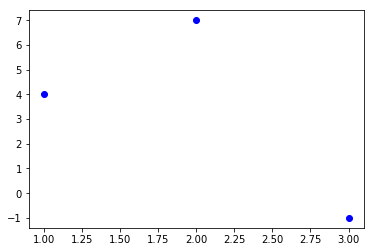

In [2]:
import matplotlib.pyplot as plt

plt.plot([1,2,3], [4,7, -1], 'bo')

Here above, you will see our very first plot using the `plt.plot` function: A simple scatter plot consisting of coordinates $$(1,4), (2,7), (3, -1)$$ on the $x$-$y$ plane. Notice the arguments passed to `plt.plot`. 

  * A `list` of the $x$-coordinates, `[1,2,3]`. In general purpose usage, this is a `Series` or an `array` object containing the predictor variables of our data. 
  
  * A `list` of the $y$-coordinates, `[4,7,-1]`. This will usually be the response variable. 
  
  * The final string `bo` is a convenience syntax for instructing `plt.plot` to create a scatterplot using round (`o`) markers coloured blue (`b`). 
  
Note that if not marker string is passed to `.plot`, `matplotlib` will output a line plot by default. 

All this is very nice, but before we go into more details about `plt.plot`, we must set up the general framework and workflow of working with this library. 

## 1.3 The canvas: `figure` and `axes`

The parent object of any `matplotlib` visualisation is the `Figure` class. Figures hold the `Axes` objects which in turn holds all the other components that make up a plot: The `artist` objects like lines, patches, dots, text, arrows, contours and the like. Even objects like legends, colorbars, axis labels, ticks and plot titles are all subclassed from either a figure object or an axes object. Note that all visualisations produced by `matplotlib` are always contained in a Figure and axes. If these are not explicitly instanced, that they are implicitly created when `plt.plot` is called. 

The `matplotlib` API can be interacted with using MATLAB style interfacing which uses function calls to `plt.plot` and various other annotation functions. 

However, in this course, we wish to emphasize the object oriented interface to the API. This makes it easier  to customize `matplotlib` and even  `seaborn` visualisations. Essentially plot customization is about tweaking the *attributes* of an object. 

To create a `figure` object:

In [16]:
fig1 = plt.figure()

When run, we see that an instance of a Figure class has been created. However, we do not see anything more that that printed output. In fact, if we were using another Python IDE like Spyder or accessing Python from the command prompt (like IPython), we will see a blank pop window created. Since we are using Jupyter Notebooks, our particular graphical renderer (`inline`) will not display this. 

From this point on, we can create the plots with desire using `plt.plot` and assign the output to a variable name. Copy the line in the cell above and paste it below. 

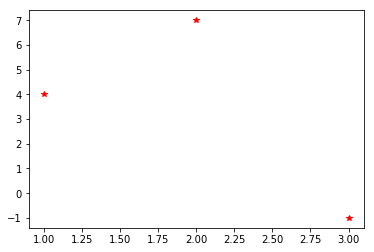

In [20]:
fig1 = plt.figure() # This line will be pasted in by course attendee. delete on deployment
ax1 = plt.plot([1,2,3], [4,7,-1], '*r') 

The reason for putting both figure instance and the axes instance calls in the same cell is so that axes `ax1` will be contained in `fig1`. It's not that we can't plot without doing this, but by doing this we can save the figure to a file by running the following command 

    fig1.savefig("my_first_plot.jpeg", dpi=300) 

in possibly another cell. Since this figure contains that `ax1` object, the saved jpeg file will contain the plot above. If we do not instance a figure, it is quite difficult (though not impossible) to save our plot. Note that if the `plot` and `figure` instance were executed in *different* cells, when `fig1.savefig` is called, your jpeg file will be empty!

You may want to rerender your plot to adjust some parameters. By putting the `.savefig` method in another cell, you create a jpeg file output *only once* after you are satisfied with what you see (in Jupyter Notebook). 

In [22]:
fig1.savefig("my_first_plot.jpeg", dpi=300)

Check your current working directory. You should see the jpeg file there now. 

Congratulations! You have completed your first visualisation project! 

# 2. Basic plotting with `.plot` method
________
The basic workflow of creating a visualisation consists on instancing a figure and axes class, getting data and plotting it and finally saving your output to a file. In this section, we will learn about `matplotlib`'s versatile `.plot` method to create basic scatter and line plots. 

The function of the `.plot` method is to create scatter and line plots as have been mentioned. You have seen how to create basic scatter plots, so lets work through a simple visualisation project using line plots. Along the way, we will learn about the various customization and keyword arguments to the `.plot` method. 

For our first task, we want to examine stock prime movements of Apple Corp. (AAPL), 3M Corp. (MMM) and Google (GOOGL) from the 9th of November 2016. Stock price data can be obtained from Google and `pandas` has an extension API to get this data from Google. We download the data, clean it and calculate the percentage difference for one time interval. 

In [19]:
import pandas as pd
import pandas_datareader.data as web # requires pandas-datareader package
from datetime import datetime


start = datetime(2016,11,9)
# end = datetime(2017, 7, 24)
tickers = ["AAPL", "MMM", "GOOGL"]
stock_panel = web.DataReader(tickers, "google", start, )

closing_pct_change = (stock_panel.loc["Close", :, :]
                                 .pct_change()) 

# closing_pct_change.to_csv("closing_pct_change.csv")
# backup plan
# closing_pct_change = pd.read_csv("closing_pct_change.csv")

## 2.1 Using `plt.plot` to plot lines

Before we get to plotting the percentage difference in stock prices. Let's get a feel of how to plot lines in `matplotlib`. Like a scatterplot, to plot lines we: 
  * Pass an array of x-coordinates and y-coordinates to the first and second arguments of `plt.plot`. 
  * If we do not pass any other arguments, `plt.plot` thinks that you want to plot a line graph. 

In [ ]:
# Use this space to do the following: Plot a simple line graph using plt.plot. Use the data below.

xcoord = [1,2,3,4]
ycoord = [5, -3, 9, -1]

# Answer: 
import matplotlib.pyplot as plt

plt.plot(xcoord, ycoord)



In matplotlib, a line can also be created for a *time series* object by passing a `Series` object indexed by `datetime` objects. If you pass such a series as an argument to `plt.plot`, `matplotlib` is smart enough to know that you are trying to make a time series plot. In our data above, we want to plot stock price changes, which is a type of time series. 

Let's give it a go first by writing 

    plt.plot(closing_pct_change["AAPL"], label="AAPL")
    plt.legend(loc="best")

in the cell below. The code above instructs matplotlib to create a time series plot. Note to pass **one** data argument to plot, `closing_pct_change["AAPL"]`. The information for date time is already contained in the *index* of that series. 

Next, we pass the `label` keyword argument to plt.plot. Label is a way for us to "name" our line. It is needed if do plot a legend (which we will). When we call `plt.legend`, we create a legend on the axes. By passing `loc` keyword argument `"best"`, we specify that the legend is to be placed in the best location as determined by `matplotlib`. 

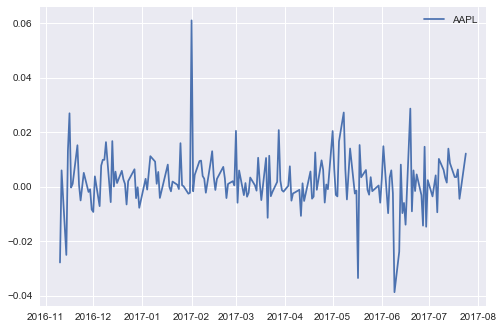

In [24]:
plt.plot(closing_pct_change["AAPL"], label="AAPL")
plt.legend(loc="best")

In `matplotlib`, an axes can contained many different such lines by repeatedly calling the `.plot` method repeated on the *same* axis object. This has the effect of constructing multiple lines on the same plot and is useful for comparing various time series objects. 

The code for accomplishing is below:

    fig, ax = plt.subplots()
    
    ax.plot(time_series_1, label=name_1)
    ax.plot(time_series_2, label=name_2)
    ...
    ax.plot(time_series_n, label=name_n)
    
We must first create a `figure` and `axis` object. And this can be accomplished together using `plt.subplots()` (and list unpacking). 

However, look at the code above, is there anyway in which you can improve this? 

## 2.2 Plotting multiple lines using the `for` loop

Yes, you probably guessed that we can use a `for` loop to repeatedly draw different time series objects on the same axes. By passing a unique name for each time series to the `label` keyword argument we are able to call legend to display the labels for each line. 

In the cell below, we apply all that we have said above to plot the percentage change in closing stock price for Apple, 3M and Google on the same plot. We then place a legend on the plot and use `.set_title` method to write down a title for our plot. 

The companies ticker codes are stored in a variable name `tickers` and this allows us to access each column in the data frame by calling its column index. 

The code to do all this is written below. Simply execute the cell below to see the results. 

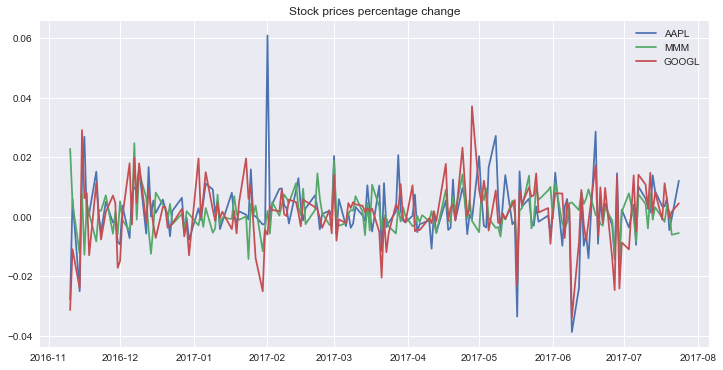

In [20]:
fig2, ax2 = plt.subplots(figsize=(12,6)) # figure size is given in (wide, height) units

for ticker in tickers:
    ax2.plot(closing_pct_change[ticker], label=ticker)

plt.legend(loc="best")
ax2.set_title("Stock prices percentage change")

## 2.3 Matplotlib marker codes

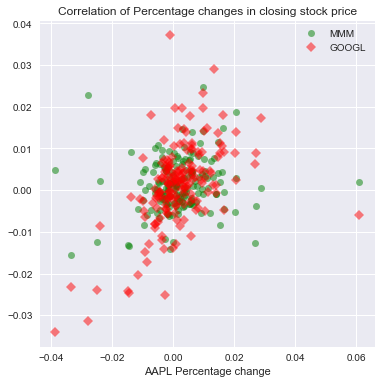

In [21]:
fig3, ax3 = plt.subplots(figsize=(6,6))

marker = ["go", "rD"]
for mark, ticker in zip(marker, tickers[1:]):
    ax3.plot(closing_pct_change["AAPL"], closing_pct_change[ticker], mark, label=ticker, alpha=0.5)
    
ax3.set_xlabel("AAPL Percentage change")
ax3.set_title("Correlation of Percentage changes in closing stock price")
plt.legend(loc="best")

# Demo: Currency exchange by country comparison project
____

Below we will use our knowledge of matplotlib to create a simple time series plot that compares the changes in currency exchange rates for some OECD and non-OECD countries. I intend to use this demo to show the whole visualisation workflow from getting data, cleaning it and visualising it. Our focus however, is on the visualisation code. So treat the other parts of the code as black boxes. 

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from datetime import datetime

# WARNING: Do not run this, takes long time to download data
# oecd_currency = web.DataReader("MEI_FIN", "oecd", start=datetime(2000,1,1), end=datetime(2017,7,24))
#oecd_currency.to_csv("oecd_economic_raw.csv") 

# Run this script instead 
# oecd_currency = pd.read_csv("oecd_economic_raw.csv", index_col=0)

#Data cleaning

idx = pd.IndexSlice

def index_to_datetime(df):
    df.index = pd.to_datetime(df.index)
    df = df.apply(lambda col: col.sort_index(ascending=True))
    return df

def keep_country_level(df):
    df.columns = df.columns.droplevel(["Subject", "Frequency"])
    return df

oecd_currency_xchange = (oecd_currency.sort_index(axis=1, ascending=True)
                                      .loc[:, idx["Currency exchange rates, monthly average",:,"Annual"]]
                                      .dropna(axis=0,how="all")
                                      .dropna(axis=1, how="any")
                                      .pipe(keep_country_level)
                                      .drop("SDR", axis=1) # Not a country 
                                      .pipe(index_to_datetime)
                                      .loc[lambda df:df.index >= datetime(2000,1,1), :]
                                      .apply(lambda col: col/col.iloc[0]*100)
                        )
oecd_currency_xchange.head()                 

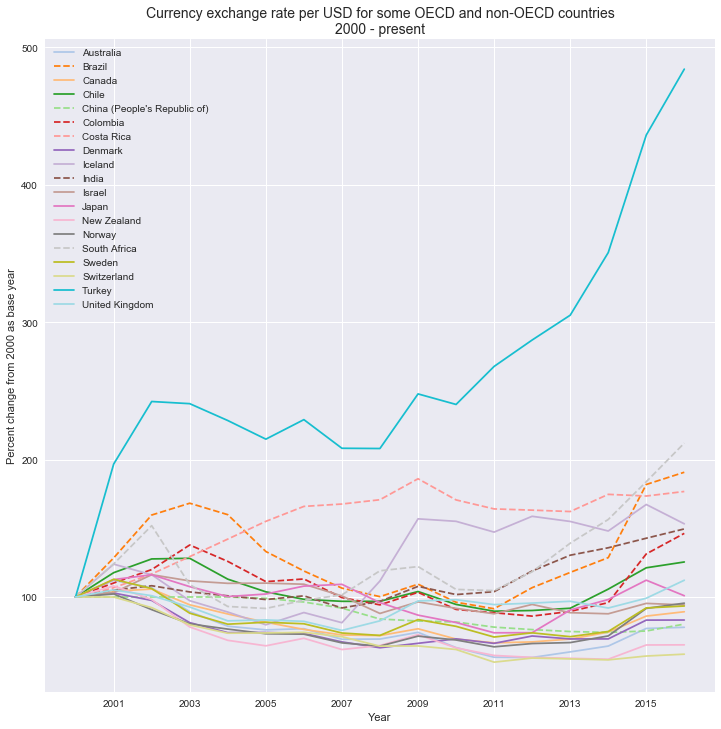

In [17]:
# oecd_currency_xchange.to_csv("oecd_currency_xchange.csv")
# Uncomment line below if need to run backup plan
#
# oecd_currency_xchange = pd.read_csv("oecd_currency_xchange.csv", infer_datetime_format=True, index_col=0, parse_dates=True )

import matplotlib.pyplot as plt
import seaborn as sns

n_cols = oecd_currency_xchange.shape[1]
color = sns.color_palette("tab20", n_cols)
non_oecd = ["Brazil", "China (People's Republic of)", "Colombia", "Costa Rica", "India", "South Africa"]

fig4, ax4 = plt.subplots(figsize=(12,12))

for _ in range(n_cols):
    plotSeries = oecd_currency_xchange.iloc[:, _]
    if plotSeries.name in non_oecd:
        marker = '--'
    else:
        marker = '-'
    ax4.plot(plotSeries, marker, label = plotSeries.name, color=color[_])

ax4.set_ylabel("Percent change from 2000 as base year")
ax4.set_xlabel("Year")
ax4.set_title("Currency exchange rate per USD for some OECD and non-OECD countries\n2000 - present", fontsize=14)
plt.legend(loc="best")


In [18]:
fig4.savefig("OECD.jpeg", dpi=300)